In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('../data/zoo_data.csv')

In [4]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
classes = ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

### Training a decision tree classifier

In [44]:
#data preparation
X_train, X_test, y_train, y_test = train_test_split(df.drop('animal_name', axis=1).drop('class_type', axis=1), df['class_type'], train_size=0.65)

In [45]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
34,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0


In [46]:
y_train.head()

65    1
95    2
89    5
34    4
16    2
Name: class_type, dtype: int64

In [47]:
#Init classifier
model = DecisionTreeClassifier()

In [48]:
#Fit data on the classifier
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0


In [50]:
#Predict on unseen data
y_pred = model.predict(X_test)

In [51]:
y_pred

array([2, 4, 3, 1, 6, 1, 2, 1, 2, 2, 6, 1, 7, 5, 2, 1, 6, 1, 2, 7, 1, 3,
       1, 7, 1, 1, 1, 1, 4, 2, 4, 2, 2, 1, 3, 1])

### Evaluating model

In [52]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



[Text(273.92727272727274, 205.35999999999999, 'X[3] <= 0.5\ngini = 0.755\nsamples = 65\nvalue = [27, 11, 2, 10, 3, 5, 7]'),
 Text(243.4909090909091, 181.2, 'X[1] <= 0.5\ngini = 0.787\nsamples = 38\nvalue = [0, 11, 2, 10, 3, 5, 7]'),
 Text(213.05454545454546, 157.04, 'X[11] <= 0.5\ngini = 0.743\nsamples = 27\nvalue = [0, 0, 2, 10, 3, 5, 7]'),
 Text(182.61818181818182, 132.88, 'X[4] <= 0.5\ngini = 0.699\nsamples = 17\nvalue = [0, 0, 2, 0, 3, 5, 7]'),
 Text(152.1818181818182, 108.72, 'X[8] <= 0.5\ngini = 0.627\nsamples = 13\nvalue = [0, 0, 2, 0, 3, 1, 7]'),
 Text(91.30909090909091, 84.56, 'X[6] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 1, 7]'),
 Text(60.872727272727275, 60.400000000000006, 'X[12] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]'),
 Text(30.436363636363637, 36.24000000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]'),
 Text(91.30909090909091, 36.24000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]'),
 Text

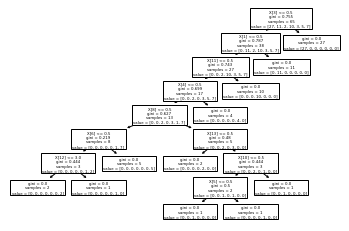

In [54]:
plot_tree(model)